In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [35]:
df = pd.read_csv("newyork_crime_2013.csv")
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN
5,Alfred Village,"4,089",5,0,0,3,2,46,10,36,0,NaN
6,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0.0
7,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3.0
8,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1.0
9,Amsterdam,"18,182",30,0,0,12,18,405,99,291,15,0.0


In [36]:
#convert from str to int
df["Population"] = df["Population"].str.replace(",", "")

df["PopulationSq"] = np.square(pd.to_numeric(df["Population"]))
#df["PopulationSq"] = float(df["Population"]) ** 2
df["Aggravated\nassault"] = pd.to_numeric(df["Aggravated\nassault"].str.replace(",", ""))
df["Burglary"] = pd.to_numeric(df["Burglary"].str.replace(",", ""))
df["Larceny-\ntheft"] = pd.to_numeric(df["Larceny-\ntheft"].str.replace(",", ""))

In [37]:
df["Murder"] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1,0)

In [38]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson',
 'PopulationSq',
 'Murder']

In [39]:
df["Property\ncrime"] = df["Property\ncrime"].str.replace(",", "")
df["Property\ncrime"] = pd.to_numeric(df["Property\ncrime"])

In [40]:
df["RobberyOH"] = np.where(pd.to_numeric(df["Robbery"].str.replace(",", "")) > 0, 1, 0)

In [43]:
#feature engineering

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

regr = linear_model.LogisticRegression()
Y = df["Murder"].values.reshape(-1, 1)

X = df[["Population", "PopulationSq", "Arson", "Robbery", "Motor\nvehicle\ntheft", "Burglary", "Larceny-\ntheft"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

print(regr.fit(X_train, y_train).score(X_test, y_test))

print(regr.fit(X, Y).score(X, Y))
cross_val_score(regr, X, Y, cv=10)

c:\users\sakok\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: '7,434'

In [42]:
#we went from .77 to .96
#create some new interactions
df["Violent\ncrime"] = df["Violent\ncrime"].str.replace(",", "")
df["ViolentCrime_Robbery"] = pd.to_numeric(df["Violent\ncrime"])* pd.to_numeric(df["Robbery"])

ValueError: Unable to parse string "1,322" at position 35

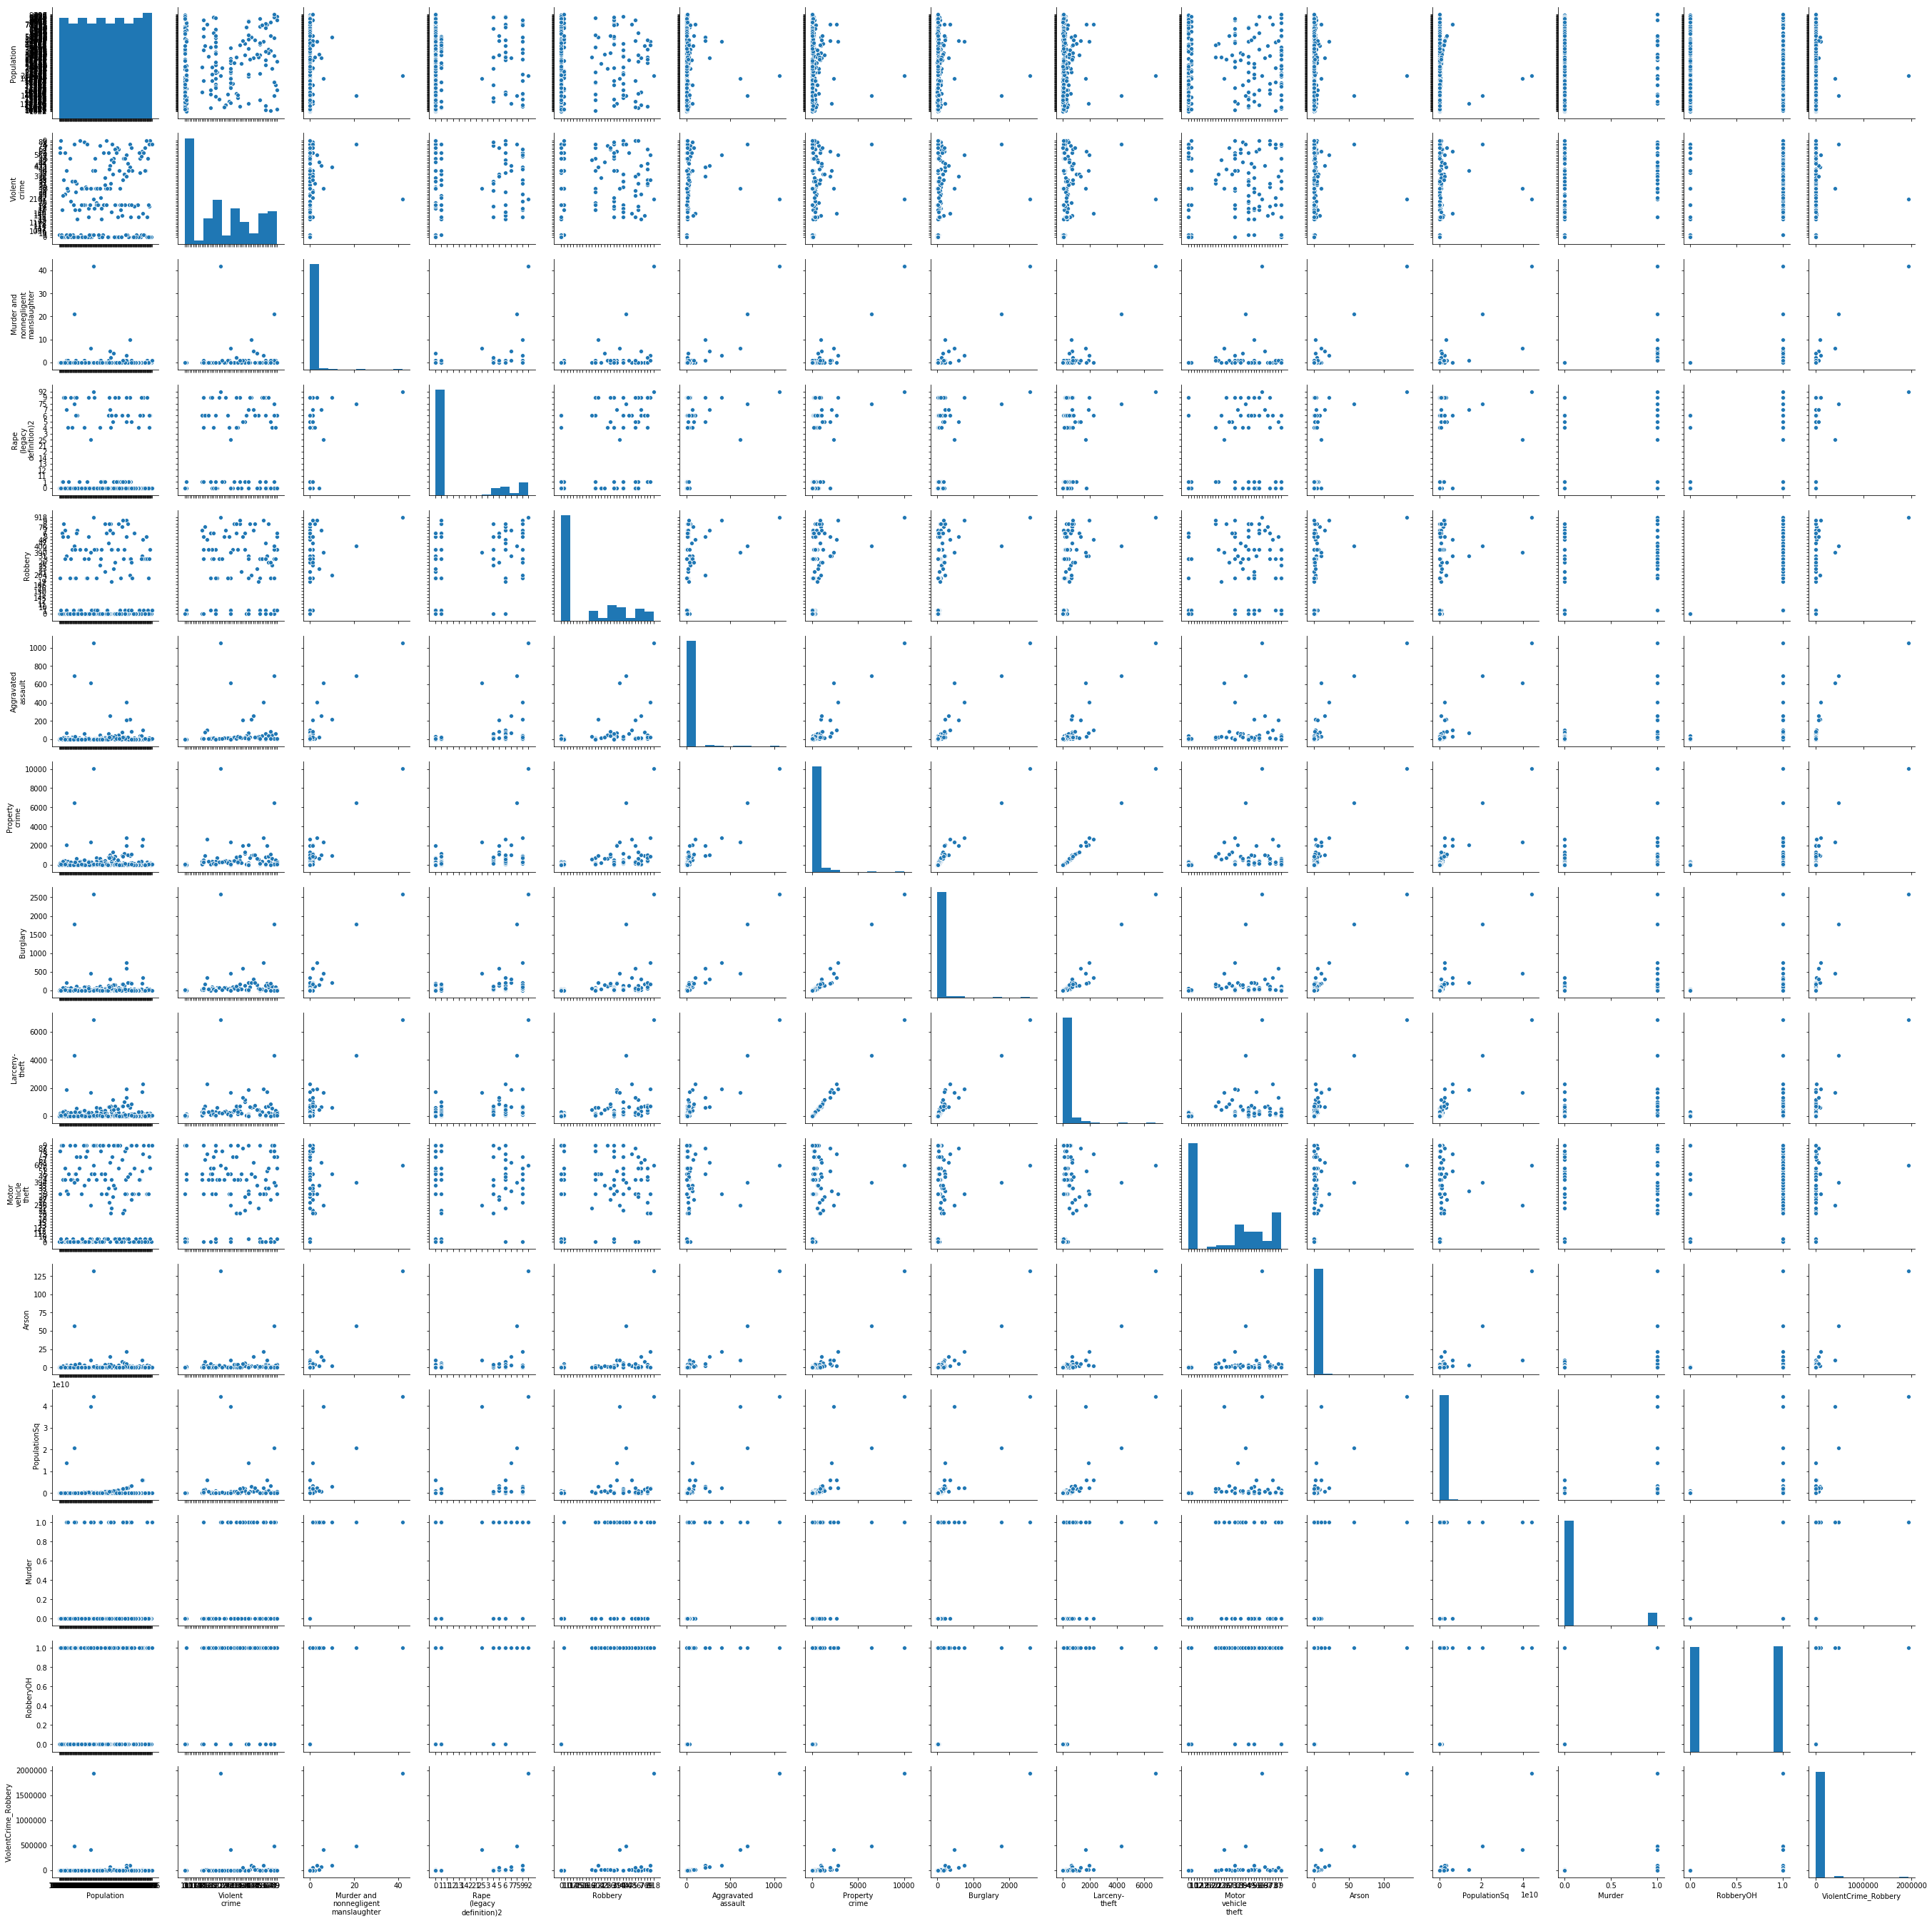

In [16]:
sns.pairplot(df)